# Are graph embeddings continuous? (Embedding by eingenmap)

Embedding by eigenmap consists of representing a graph in a low dimensional space made of its principal (generalized) eigenvectors.

Let $L$ be the graph Laplacian and $\epsilon \mapsto L(\epsilon)$ a continuous perturbation of $L$ (such as adding a small noise to the edges weights). [Acker](https://www.ams.org/journals/proc/1974-042-01/S0002-9939-1974-0326457-7/S0002-9939-1974-0326457-7.pdf) showed that the eigenvectors of $L(\epsilon)$ are continuous with respect to $\epsilon$ if its eigenvalues are all distinct at each $\epsilon$.

In the context of graph Laplacian, multiplicity of eigenvalues usually occur only for the zero eigenvalues, and this multiplicity encodes the number of connected components.

The below shows two examples : a random graph with a random edge cut, and graph with two communities linked by a single edge. Eigenmap embedding of the former remains stable, while the embedding of the later brutally changes when the critical edge is removed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

from lib import *

In [2]:
N = 20
# Barabasi-Albert parameter
m = 2
# number of edge(s) to remove
k_remove = 1

## Continuous embedding under removal of an edge (while keeping the graph connected)

/home/sauxpa/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:296: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/sauxpa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


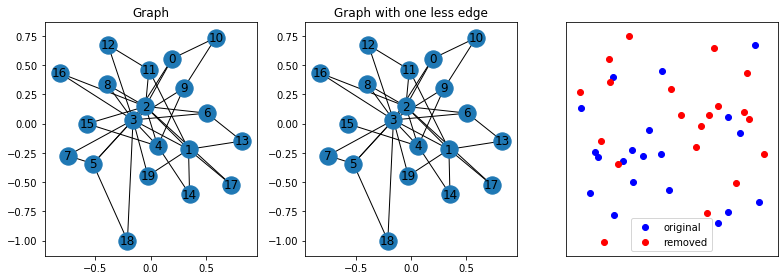

In [3]:

# generate a random graph
G = nx.barabasi_albert_graph(N, m)

# add some random weights on each edge
for u, v in G.edges():
    G[u][v]['weight'] = np.random.rand()
    
for u, v, d in G.edges(data=True):
    d['weight'] = np.random.rand()
    
# save layout
pos = nx.spring_layout(G)

# create a new graph with one edge randomly removed
G_removed = remove_random_edges(G, k=k_remove, in_place=False)

# graph Laplacian
L = nx.laplacian_matrix(G)
L_removed = nx.laplacian_matrix(G_removed)

emb = eigenmap_embedding(L, k=2)
emb_removed = eigenmap_embedding(L_removed, k=2)

# plot the graph
fig, axes = plt.subplots(figsize=(11,4), nrows=1, ncols=3)

ax = axes[0]
nx.draw_networkx(G, pos = pos, ax=ax)
ax.set_title('Graph')
    
ax = axes[1]
nx.draw_networkx(G_removed, pos = pos, ax=ax)
ax.set_title('Graph with one less edge')

ax = axes[2]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_removed[:, 0], emb_removed[:, 1], label='removed', color='r')
ax.legend()

plt.xticks([], [])
plt.tight_layout()
plt.show()

## Discontinuous embedding under removal of an edge that disconnects the graph

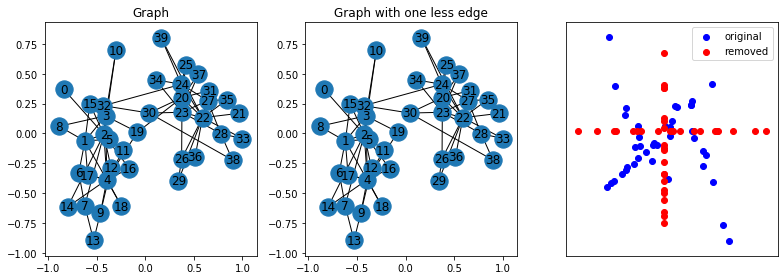

In [4]:
# generate a random graph that bridges to clusters
G1 = nx.barabasi_albert_graph(N, 2)
G2 = nx.barabasi_albert_graph(N, 2)

# relabel nodes of G2
d = {}
for v in G1.nodes:
    d[v] = N+v
G2 = nx.relabel_nodes(G2, d)

G = nx.union(G1, G2)

G.add_edge(N-1, N)
# add some random weights on each edge
for _, _, d in G.edges(data=True):
    d['weight'] = np.random.rand()
    
# save layout
pos = nx.spring_layout(G)

# create a new graph by removing the bridge edge, resulting in a disconnected graph
G_removed = deepcopy(G)
G_removed.remove_edge(N-1, N)

# graph Laplacian
L = nx.laplacian_matrix(G)
L_removed = nx.laplacian_matrix(G_removed)

emb = eigenmap_embedding(L, k=2)
emb_removed = eigenmap_embedding(L_removed, k=2)

# plot the graph
fig, axes = plt.subplots(figsize=(11,4), nrows=1, ncols=3)

ax = axes[0]
nx.draw_networkx(G, pos = pos, ax=ax)
ax.set_title('Graph')
    
ax = axes[1]
nx.draw_networkx(G_removed, pos = pos, ax=ax)
ax.set_title('Graph with one less edge')

ax = axes[2]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_removed[:, 0], emb_removed[:, 1], label='removed', color='r')
ax.legend()

plt.xticks([], [])
plt.tight_layout()
plt.show()